2020-04-29 15:46:33 

I updated the graphs from V2. All the experiments were done using Felix version of the code, which includes models Lenet300-100, Lenet5 and Alexnet. Severals modifications were done to the code including the implementation of early stopping. We can now see a much smoother increase in accuracy (or decrease in classification error), where there are no major spikes in any specific round.

2020-05-01 15:34:31 

<font size="3"><b> Exprimental Setting </b></font>
    <li><b>KL scaling factor: </b>$\frac{1}{\#SamplesPerBatch}$. This is <font color="red"> extremely important</font> since changing this will result in wide performance changes. In most cases, I found other Kl scaling factor to be detrimental to MNIST data. In the implementation this is indicated by the variable <i><font color="blue">standard2</font></i>.</li>
    <li><b>Training batch size</b>: 100</li>
    <li><b>Training/Testing Method:</b> Unlike the CVPR paper, <b>we do not retrain from scratch</b>. We found that this method is mostly <b>detrimental to the performance </b> of all models (Both Bayesian and Non-bayesian). At each round, we simply re-use the previous weights, and train the model for a significantly less number of epoch. More precisely, We allot 5% of the training data as validation set and use an early stopping technique, to get the best parameters based on this validation set.</li>
    <li><b>Number of MCMC samples</b>: 5</li>
    <li><b>Optimization Algorithm</b>: Adam</li>
<font size="3"><b> Exprimental Setting for Dropout neural network (NN)</b></font>
<li>Batch Size: 32</li>
<li>Dropout Rate: 0.5 (default in pytorch)</li>
<li><b>Optimization Algorithm</b>: Adam</li>
<li><b>Training/Testing Method:</b> Unlike the CVPR paper, <b>we do not retrain from scratch</b>. We found that this method is mostly <b>detrimental to the performance </b> of all models (Both Bayesian and Non-bayesian). At each round, we simply re-use the previous weights, and train the model for a significantly less number of epoch. More precisely, We allot 5% of the training data as validation set and use an early stopping technique, to get the best parameters based on this validation set.</li>
<li><b>Number of NN instantiations</b>: 25. That is, when performing active learning, we create 25 instantiations of NN with dropout and estimate variation-ratio and entropy.</li>
The legend used in the graph are as follows:
AL stands for <u>a</u>ctive <u>l</u>earning with dropout-based neural network, <font color="blue">AL-VR</font> stands for <b><u>a</u>ctive <u>l</u>earning using <u>v</u>ariation-<u>r</u>atio</b>, <font color="blue">AL-E</font> stands for <u>a</u>ctive <u>l</u>earning using <u>E</u>ntropy, RS stands for <u>r</u>andom <u>s</u>ampling, legends with the character <font color="blue">B</font> in front of them are the Bayesian couter parts of the variational-ratio and entropy active-learning algorithms respectively.

All the results were obtained with an ensemble 25 instantiations of NN. The graphs here are the average prediction accuracies.
</p>

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
# import mpld3
from matplotlib import rc
import numpy as np
import pandas as pd
import os
# supposed to help make graphs interactive, to zoom in, but does not work
# mpld3.enable_notebook()

In [4]:
plot_pth = 'McDropoutVsBayesianVariationRatio/'
class getMetric():

    def __init__(self, type, pth, truncate_end, truncate_st):
        self.files = [f for f in os.listdir(pth)]
        self.files = sorted(self.files, key=lambda x: int(x.split('round')[1].split('.csv')[0]))
        if type == 'accuracy':
            indx = 10
        # classification error
        if truncate_end == None:
            self.metric = [1 - pd.read_csv(pth + f).iloc[indx][1] for f in self.files][:40]
        else:
            if not truncate_st: truncate_st = 0
            self.metric = [1 - pd.read_csv(pth + f).iloc[indx][1] for f in self.files][truncate_st:truncate_end]

def PlotGraph(figure_nam,data_locs,labels,truncate_end=None,truncate_st=None, x_l=None,y_l=None):
    metric_list = [getMetric('accuracy',pth,truncate_end, truncate_st).metric for pth in data_locs]
    rounds = range(len(metric_list[0]))
    colors = ['#9B59B6','#76D7C4','#F5B041','#E74C3C','#2C3E50']
    markers = ['o','o','o','^','^']
    line_style = ['-','-','-','--','--']
    if len(metric_list) == 4:
        markers = ['o','o','^','^']
        line_style = ['-','-','--','--']
    font = {'family': 'Serif',
            'weight': 'normal',
            'size': 14}
    rc('font', **font)
    if not figure_nam:
        figure_nam = 'my_fig.png'
    fig = plt.figure(num=1, figsize=(14, 7))
    ax = plt.axes()
    for i,m in enumerate(metric_list):
        ax.plot(rounds, m, marker=markers[i], linestyle=line_style[i], color=colors[i], label=labels[i])
    if x_l:
        ax.set_xlim(x_l)
    if y_l:
        ax.set_ylim(y_l)
    ax.set_ylabel('classification error', fontsize=18)
    ax.set_xlabel(r'# samples ($\times 50$)', fontsize=18)
    ax.legend(loc=1, ncol=1, frameon=True)
    plt.savefig(plot_pth+figure_nam, orientation='portrait', bbox_inches='tight', dpi=300)

<h2 align="center">MNIST data</h2>

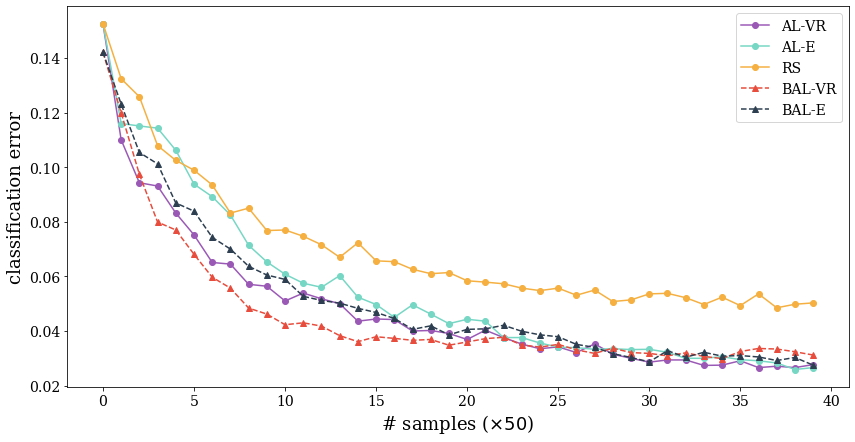

In [33]:
# 2020-05-03 19:07:02 500 initial samples and KL Scalar as standard1 (i.e., 1/m)
pth_1 = '../results_archive/McDropout/lenet300-100_mnist_isample500_e50_r40_ac1_optim-Adam_top-k100_b32_rtAfter40_variation-ratio/'
pth_2 = '../results_archive/McDropout/lenet300-100_mnist_isample500_e50_r40_ac1_optim-Adam_top-k100_b32_rtAfter40_entropy/'
pth_3 = '../results_archive/McDropout/lenet300-100_mnist_isample500_e50_r40_ac0_optim-Adam_top-k100_b32_rtAfter40/'
# bayesian results
pth_4 = '../results_archive/Blenet300-100_mnist_isample500_e40_r40_ac1_Klreg-standard1_b100_mcmc5_netType-blundelloptim-Adam_variation-ratio_rtAfter40/'
pth_5 = '../results_archive/Blenet300-100_mnist_isample500_e40_r40_ac1_Klreg-standard1_b100_mcmc5_netType-blundelloptim-Adam_entropy_rtAfter40/'
locs = [pth_1, pth_2, pth_3, pth_4,pth_5]
labels = ['AL-VR','AL-E','RS','BAL-VR','BAL-E']
f_name = 'fig_a'
PlotGraph(f_name,locs,labels)

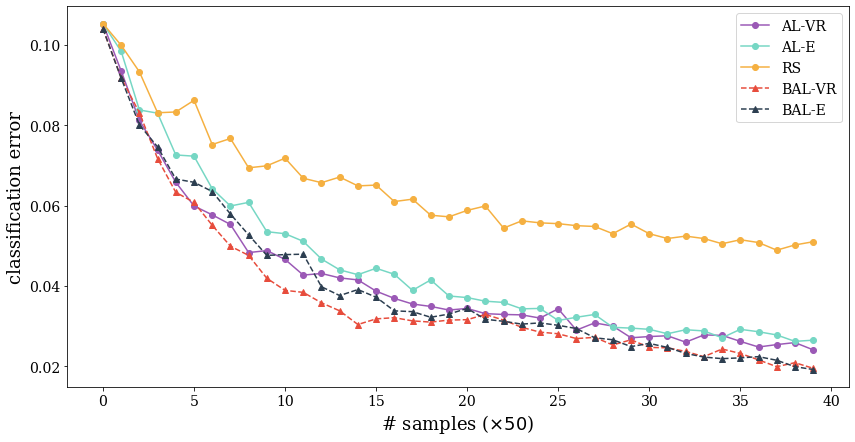

In [5]:
# 1000 initial samples
pth_1 = '../results_archive/McDropout/lenet300-100_mnist_isample1000_e50_r40_ac1_optim-Adam_top-k100_b32_rtAfter40_variation-ratio/'
pth_2 = '../results_archive/McDropout/lenet300-100_mnist_isample1000_e50_r40_ac1_optim-Adam_top-k100_b32_rtAfter40_entropy/'
pth_3 = '../results_archive/McDropout/lenet300-100_mnist_isample1000_e50_r40_ac0_optim-Adam_top-k100_b32_rtAfter40/'
# bayesian results
pth_4 = '../results_archive/Blenet300-100_mnist_isample1000_e40_r40_ac1_Klreg-standard1_b100_mcmc5_netType-blundelloptim-Adam_variation-ratio_rtAfter40/'
pth_5 = '../results_archive/Blenet300-100_mnist_isample1000_e40_r40_ac1_Klreg-standard1_b100_mcmc5_netType-blundelloptim-Adam_entropy_rtAfter40/'
locs = [pth_1, pth_2, pth_3, pth_4,pth_5]
labels = ['AL-VR','AL-E','RS','BAL-VR','BAL-E']
f_name = 'fig_b'
PlotGraph(f_name,locs,labels)

<p>From the results, one can observe that the bayesian version of active learning performs better than the frequentist coutner part. We don't see any major difference in the first 10-15 rounds. However, the Bayesian active learning starts to outperform both AL-VR and AL-E after around 15th round. Consistent with the CVPR paper, the variation-ratio seems to be the best metric for uncertainty calculation. This is also in the case of bayesian NN.</p>

<b><p style="font-size:20px">Retraining from Scratch Does not Work for Active Learning</p></b>
    <p>To validate this outcome, I retraining from scratch after every round and compared against partial retraining (i.e., after 10 rounds). The following graph shows this outcome. I am only showing the outcome for McDropout, but I noticed that this was the case for even Bayesian NN. Here, RtAfter1 implies, we retrain after every single round.</p>

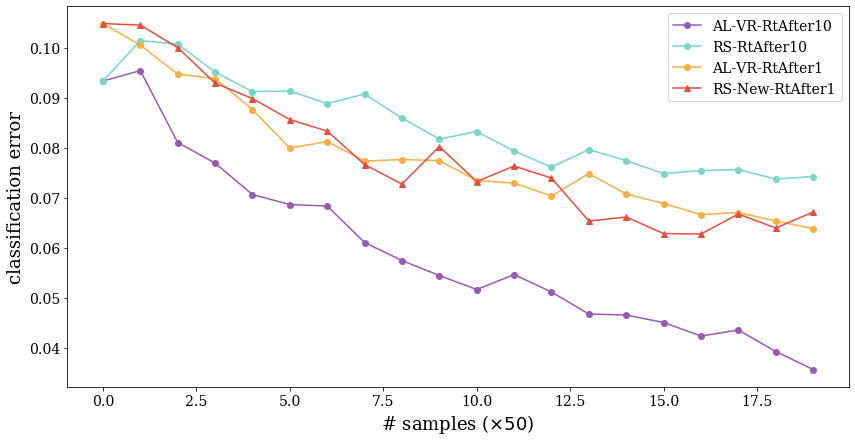

In [7]:
# 1000 initial samples retraining from scratch is clearly not leading to god results for active learning
pth_1 = '../results_archive/McDropout/lenet300-100_mnist_isample1000_e20_r40_ac1_b32_retrain0_variation-ratio/'
pth_2 = '../results_archive/McDropout/lenet300-100_mnist_isample1000_e20_r40_ac0_retrain0/'
pth_3 = '../results_archive/McDropout/lenet300-100_mnist_isample1000_e50_r20_ac1_top-k100_b32_rtAfter1_variation-ratio/'
pth_4 = '../results_archive/McDropout/lenet300-100_mnist_isample1000_e50_r20_ac0_top-k100_b32_rtAfter1/'
locs = [pth_1, pth_2, pth_3, pth_4]
labels = ['AL-VR-RtAfter10','RS-RtAfter10','AL-VR-RtAfter1','RS-New-RtAfter1']
f_name = 'fig_k'
PlotGraph(figure_nam=f_name,data_locs=locs,labels=labels,truncate=20)

2020-05-01 15:41:26 
<h2 align="center">Fashion MNIST data</h2>

<font size="3"><b> Exprimental Setting for Bayesian NN </b></font>
    <li><b>KL scaling factor: </b>$\frac{1}{\#Batches-Per-Round}$. This is <font color="red"> extremely important</font> since changing this will result in wide performance changes. Unlike, MNIST, Fashion MNIST seems to more robust when scaling KL with blundell-based scaling factor. However, the results lag behind the McDropout. The negative effect of using this regularizer can be seen the graphs, where there are multiple peaks indicating the increase of classification error (due to re-training). In the implementation this is indicated by the variable <i><font color="blue">standard2</font></i>.</li>
    <li><b>Training batch size</b>: 100</li>
    <li><b>Training/Testing Method:</b> Unlike the CVPR paper, <b>we do not retrain from scratch</b>. We found that this method is mostly <b>detrimental to the performance </b> of all models (Both Bayesian and Non-bayesian). At each round, we simply re-use the previous weights, and train the model for a significantly less number of epoch. More precisely, We allot 5% of the training data as validation set and use an early stopping technique, to get the best parameters based on this validation set.</li>
    <li><b>Number of MCMC samples</b>: 5</li>
    <li><b>Optimization Algorithm</b>: Adam</li>
    <li><b>Number of NN instantiations</b>: To estimate Variation-Ratio and Entropy, we sample the Bayesian NN 25 times. Although I found just 10 samples to be sufficient.</li>
<font size="3"><b> Exprimental Setting for Dropout neural network (NN)</b></font>
<li>Batch Size: 32</li>
<li>Dropout Rate: 0.5 (default in pytorch)</li>
<li><b>Optimization Algorithm</b>: Adam</li>
<li><b>Training/Testing Method:</b> Unlike the CVPR paper, <b>we do not retrain from scratch</b>. We found that this method is mostly <b>detrimental to the performance </b> of all models (Both Bayesian and Non-bayesian). At each round, we simply re-use the previous weights, and train the model for a significantly less number of epoch. More precisely, We allot 5% of the training data as validation set and use an early stopping technique, to get the best parameters based on this validation set.</li>
<li><b>Number of NN instantiations</b>: 25. That is, when performing active learning, we create 25 instantiations of NN with dropout and estimate variation-ratio and entropy.</li>
The legend used in the graph are as follows:
AL stands for <u>a</u>ctive <u>l</u>earning with dropout-based neural network, <font color="blue">AL-VR</font> stands for <b><u>a</u>ctive <u>l</u>earning using <u>v</u>ariation-<u>r</u>atio</b>, <font color="blue">AL-E</font> stands for <u>a</u>ctive <u>l</u>earning using <u>E</u>ntropy, RS stands for <u>r</u>andom <u>s</u>ampling, legends with the character <font color="blue">B</font> in front of them are the Bayesian couter parts of the variational-ratio and entropy active-learning algorithms respectively.

All the results were obtained with an ensemble 25 instantiations of NN. The graphs here are the average prediction accuracies.
</p>

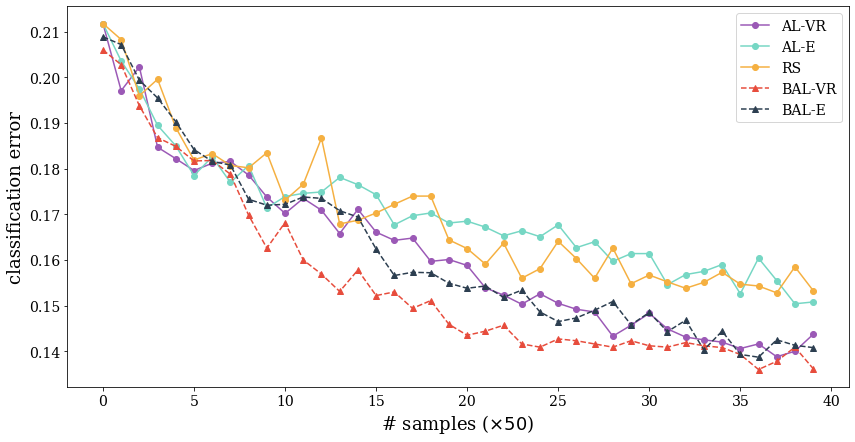

In [30]:
# 2020-05-03 19:07:02 500 initial samples and KL Scalar as standard1 (i.e., 1/m)
pth_1 = '../results_archive/McDropout/lenet300-100_fmnist_isample500_e50_r40_ac1_optim-Adam_top-k100_b32_rtAfter40_variation-ratio/'
pth_2 = '../results_archive/McDropout/lenet300-100_fmnist_isample500_e50_r40_ac1_optim-Adam_top-k100_b32_rtAfter40_entropy/'
pth_3 = '../results_archive/McDropout/lenet300-100_fmnist_isample500_e50_r40_ac0_optim-Adam_top-k100_b32_rtAfter40/'
# bayesian results
pth_4 = '../results_archive/Blenet300-100_fmnist_isample500_e40_r40_ac1_Klreg-standard1_b100_mcmc10_netType-blundelloptim-Adam_variation-ratio_rtAfter40/'
pth_5 = '../results_archive/FBlenet300-100_fmnist_isample500_e40_r40_ac1_Klreg-standard2_b100_mcmc20_netType-blundelloptim-Adam_entropy_rtAfter40/'
locs = [pth_1, pth_2, pth_3, pth_4,pth_5]
labels = ['AL-VR','AL-E','RS','BAL-VR','BAL-E']
f_name = 'fig_c'
PlotGraph(f_name,locs,labels)

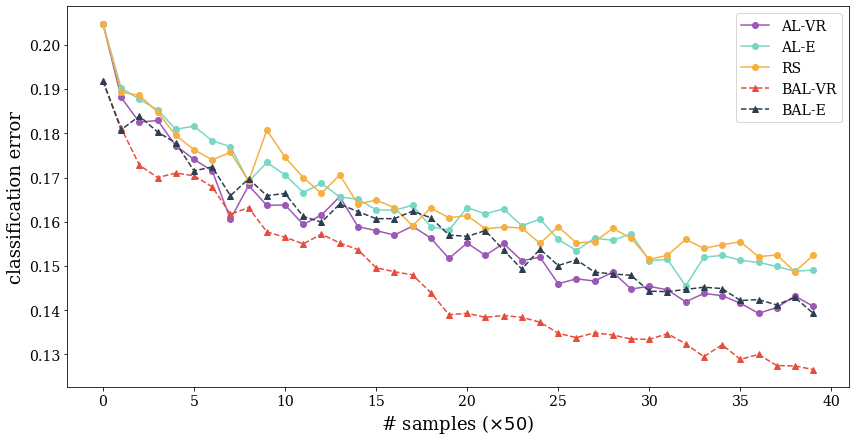

In [10]:
# 1000 initial samples
pth_1 = '../results_archive/McDropout/lenet300-100_fmnist_isample1000_e50_r40_ac1_optim-Adam_top-k100_b32_rtAfter40_variation-ratio/'
pth_2 = '../results_archive/McDropout/lenet300-100_fmnist_isample1000_e50_r40_ac1_optim-Adam_top-k100_b32_rtAfter40_entropy/'
pth_3 = '../results_archive/McDropout/lenet300-100_fmnist_isample1000_e50_r40_ac0_optim-Adam_top-k100_b32_rtAfter40/'
# bayesian results
pth_4 = '../results_archive/Blenet300-100_fmnist_isample1000_e40_r40_ac1_Klreg-standard1_b100_mcmc5_netType-blundelloptim-Adam_variation-ratio_rtAfter40/'
pth_5 = '../results_archive/Blenet300-100_fmnist_isample1000_e40_r40_ac1_Klreg-standard1_b100_mcmc5_netType-blundelloptim-Adam_entropy_rtAfter40/'
locs = [pth_1, pth_2, pth_3, pth_4,pth_5]
labels = ['AL-VR','AL-E','RS','BAL-VR','BAL-E']
f_name = 'fig_d'
PlotGraph(f_name,locs,labels)

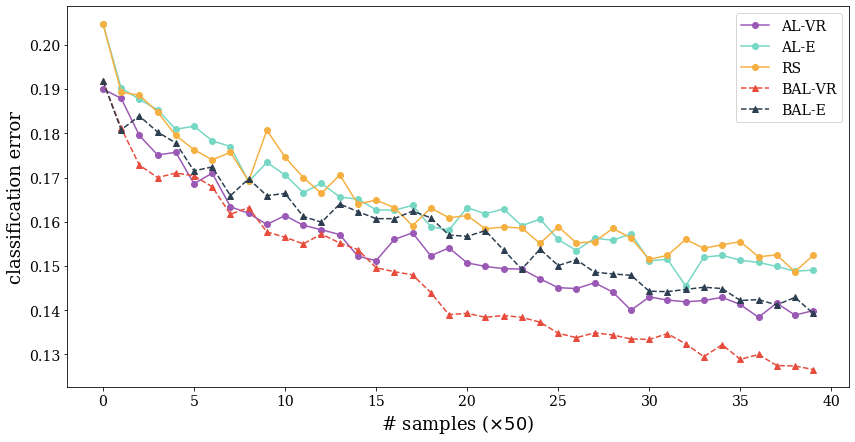

In [4]:
# 1000 initial samples
pth_1 = '../results/McDropout/lenet300-100_fmnist_isample1000_e50_r41_ac1_optim-Adam_top-k100_b32_rtAfter10_variation-ratio/'
pth_2 = '../results_archive/McDropout/lenet300-100_fmnist_isample1000_e50_r40_ac1_optim-Adam_top-k100_b32_rtAfter40_entropy/'
pth_3 = '../results_archive/McDropout/lenet300-100_fmnist_isample1000_e50_r40_ac0_optim-Adam_top-k100_b32_rtAfter40/'
# bayesian results
pth_4 = '../results_archive/Blenet300-100_fmnist_isample1000_e40_r40_ac1_Klreg-standard1_b100_mcmc5_netType-blundelloptim-Adam_variation-ratio_rtAfter40/'
pth_5 = '../results_archive/Blenet300-100_fmnist_isample1000_e40_r40_ac1_Klreg-standard1_b100_mcmc5_netType-blundelloptim-Adam_entropy_rtAfter40/'
locs = [pth_1, pth_2, pth_3, pth_4,pth_5]
labels = ['AL-VR','AL-E','RS','BAL-VR','BAL-E']
f_name = 'fig_d'
PlotGraph(f_name,locs,labels)

2020-04-12 12:33:00 
<h1 align="center"> <a href="https://engmrk.com/lenet-5-a-classic-cnn-architecture/"> Lenet 5 </a></h1>

<font size="3"><b> Exprimental Setting for Bayesian NN </b></font>
    <li><b>KL scaling factor: </b>$\frac{1}{\#SamplesPerBatch}$. This is <font color="red"> extremely important</font> since changing this will result in wide performance changes. Unlike, MNIST, Fashion MNIST seems to more robust when scaling KL with blundell-based scaling factor. However, the results lag behind the McDropout. The negative effect of using this regularizer can be seen the graphs, where there are multiple peaks indicating the increase of classification error (due to re-training). In the implementation this is indicated by the variable <i><font color="blue">standard2</font></i>.</li>
    <li><b>Training batch size</b>: 100</li>
    <li><b>No retraining:</b> <font color="red">Unlike the dense layers, in Lenet5 I don't retrain from scratch</font>. This is mainly due to the change in the way I calculate KL in bayesian layers. I never found the classification accuracy to drop. Additionally, I found retraining from scratch was detrimental to the performance.</li>
    <li><b>Number of MCMC samples</b>: 20</li>
    <li><b>Optimization Algorithm</b>: Adam</li>
    <li>(no retraining leads to better result)</li>
    <li><b>Number of NN instantiations</b>: To estimate Variation-Ratio and Entropy, we sample the Bayesian NN 25 times.</li>
<font size="3"><b> Exprimental Setting for Dropout neural network (NN)</b></font>
<li>Batch Size: 32</li>
<li> <b>Dropout Rate</b>: 0.5 for the last 3 dense layers and 0.25 for the convolution layers</li>
<li><b>Partial complete retraining</b>:We retrain the model from scratch after 10 epochs.<li>
<li><b>Optimization Algorithm</b>: Adam</li>
<li><b>Number of NN instantiations</b>: 25. That is, when performing active learning, we create 25 instantiations of NN with dropout and estimate variation-ratio and entropy.</li>
The legend used in the graph are as follows:
AL stands for <u>a</u>ctive <u>l</u>earning with dropout-based neural network, <font color="blue">AL-VR</font> stands for <b><u>a</u>ctive <u>l</u>earning using <u>v</u>ariation-<u>r</u>atio</b>, <font color="blue">AL-E</font> stands for <u>a</u>ctive <u>l</u>earning using <u>E</u>ntropy, RS stands for <u>r</u>andom <u>s</u>ampling, legends with the character <font color="blue">B</font> in front of them are the Bayesian couter parts of the variational-ratio and entropy active-learning algorithms respectively.

All the results were obtained with an ensemble 25 instantiations of NN. The graphs here are the average prediction accuracies.
</p>

<h2 align="center">MNIST data</h2>

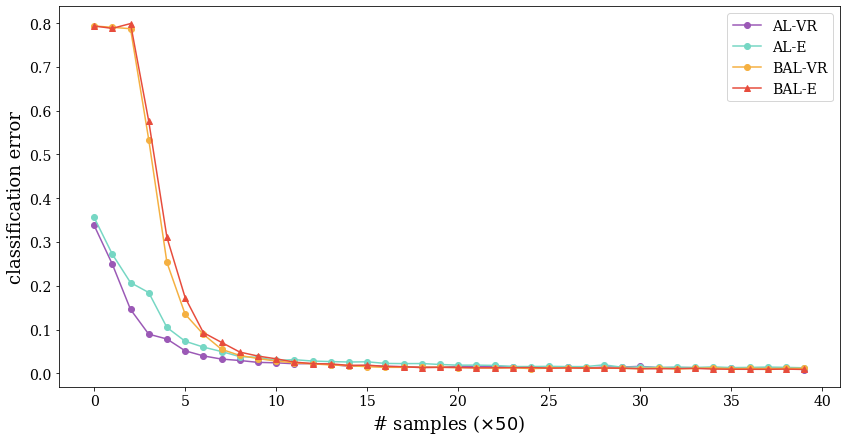

In [14]:
# 50 initial samples
pth_1 = '../results_archive/McDropout/lenet5_mnist_isample50_e20_r40_ac1_b32_retrain0_variation-ratio/'
pth_2 = '../results_archive/McDropout/lenet5_mnist_isample50_e20_r40_ac1_b32_retrain0_entropy/'
pth_3 = '../results_archive/Lenet5Hybrid_mnist_isample50_e15_r41_ac1_Klreg-standard2_b100_mcmc5_netType-blundell_variation-ratio_retrain0/'
pth_4 = '../results_archive/Lenet5Hybrid_mnist_isample50_e15_r41_ac1_Klreg-standard2_b100_mcmc5_netType-blundell_entropy_retrain0/'
locs = [pth_1, pth_2, pth_3, pth_4]
labels = ['AL-VR','AL-E','BAL-VR','BAL-E']
f_name = 'fig_e'
PlotGraph(f_name,locs,labels)

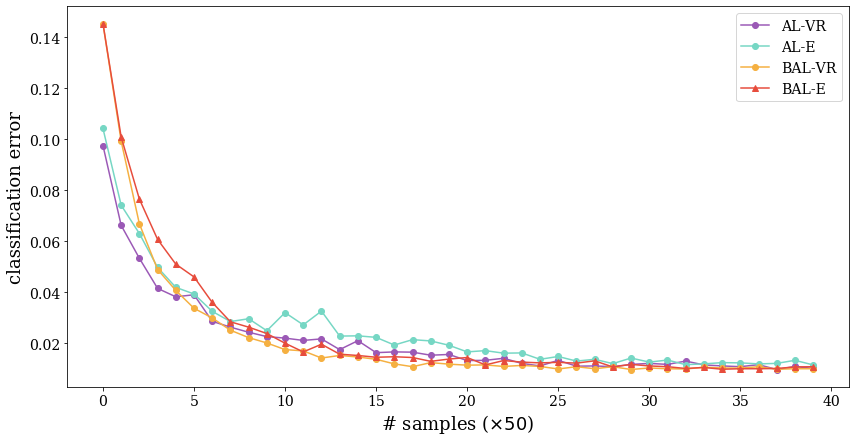

In [13]:
# 500 initial samples
pth_1 = '../results_archive/McDropout/lenet5_mnist_isample500_e20_r40_ac1_b32_retrain0_variation-ratio/'
pth_2 = '../results_archive/McDropout/lenet5_mnist_isample500_e20_r40_ac1_b32_retrain0_entropy/'
pth_3 = '../results_archive/Lenet5Hybrid_mnist_isample500_e15_r41_ac1_Klreg-standard2_b100_mcmc5_netType-blundell_variation-ratio_retrain0/'
pth_4 = '../results_archive/Lenet5Hybrid_mnist_isample500_e15_r41_ac1_Klreg-standard2_b100_mcmc5_netType-blundell_entropy_retrain0/'
locs = [pth_1, pth_2, pth_3, pth_4]
labels = ['AL-VR','AL-E','BAL-VR','BAL-E']
f_name = 'fig_f'
PlotGraph(f_name,locs,labels)

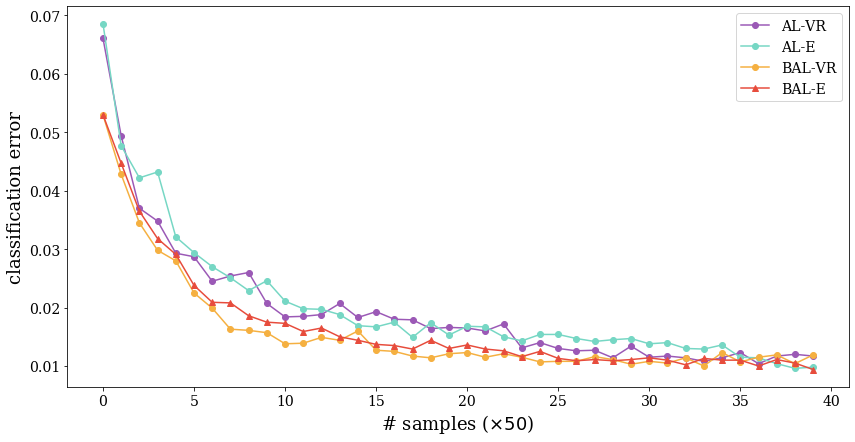

In [12]:
# 1000 initial samples
pth_1 = '../results_archive/McDropout/lenet5_mnist_isample1000_e20_r40_ac1_b32_retrain0_variation-ratio/'
pth_2 = '../results_archive/McDropout/lenet5_mnist_isample1000_e20_r40_ac1_b32_retrain0_entropy/'
pth_3 = '../results_archive/Lenet5Hybrid_mnist_isample1000_e15_r41_ac1_Klreg-standard2_b100_mcmc5_netType-blundell_variation-ratio_retrain0/'
pth_4 = '../results_archive/Lenet5Hybrid_mnist_isample1000_e15_r41_ac1_Klreg-standard2_b100_mcmc5_netType-blundell_entropy_retrain0/'
locs = [pth_1, pth_2, pth_3, pth_4]
labels = ['AL-VR','AL-E','BAL-VR','BAL-E']
f_name = 'fig_g'
PlotGraph(f_name,locs,labels)

<h2 align="center">Fashion MNIST data</h2>

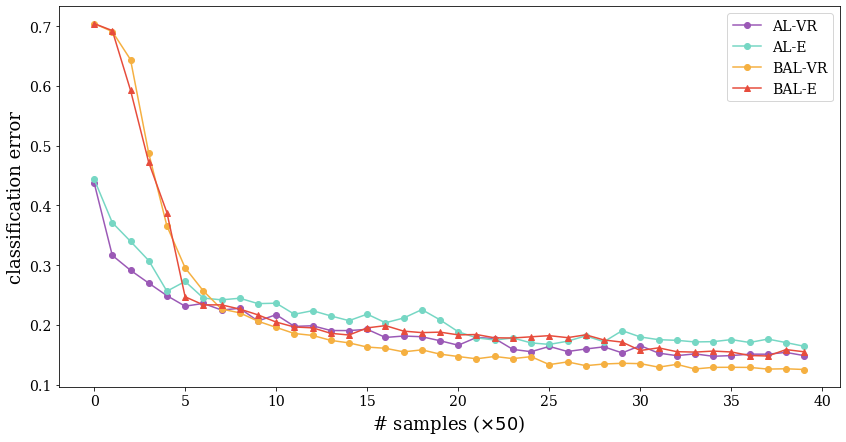

In [10]:
# 50 initial samples
pth_1 = '../results_archive/McDropout/lenet5_fmnist_isample50_e20_r40_ac1_b32_retrain0_variation-ratio/'
pth_2 = '../results_archive/McDropout/lenet5_fmnist_isample50_e20_r40_ac1_b32_retrain0_entropy/'
pth_3 = '../results_archive/Lenet5Hybrid_fmnist_isample50_e15_r41_ac1_Klreg-standard2_b100_mcmc5_netType-blundell_variation-ratio_retrain0/'
pth_4 = '../results_archive/Lenet5Hybrid_fmnist_isample50_e15_r41_ac1_Klreg-standard2_b100_mcmc5_netType-blundell_entropy_retrain0/'
locs = [pth_1, pth_2, pth_3, pth_4]
labels = ['AL-VR','AL-E','BAL-VR','BAL-E']
f_name = 'fig_h'
PlotGraph(f_name,locs,labels)

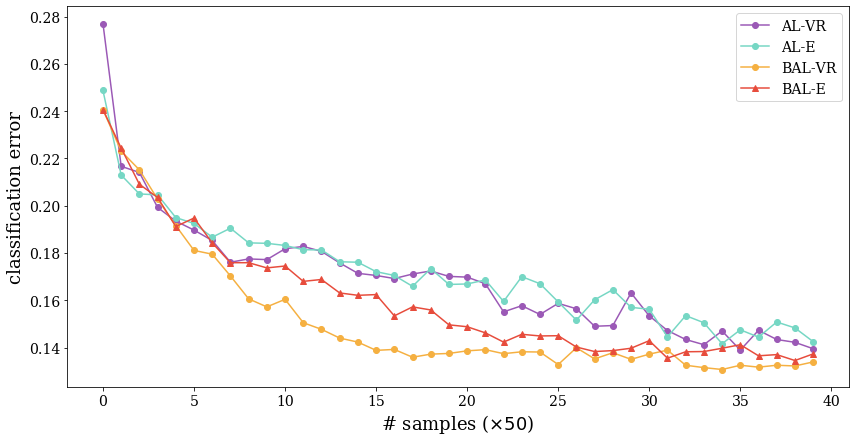

In [9]:
# 500 initial samples
pth_1 = '../results_archive/McDropout/lenet5_fmnist_isample500_e20_r40_ac1_b32_retrain0_variation-ratio/'
pth_2 = '../results_archive/McDropout/lenet5_fmnist_isample500_e20_r40_ac1_b32_retrain0_entropy/'
pth_3 = '../results_archive/Lenet5Hybrid_fmnist_isample500_e15_r41_ac1_Klreg-standard2_b100_mcmc5_netType-blundell_variation-ratio_retrain0/'
pth_4 = '../results_archive/Lenet5Hybrid_fmnist_isample500_e15_r41_ac1_Klreg-standard2_b100_mcmc5_netType-blundell_entropy_retrain0/'
locs = [pth_1, pth_2, pth_3, pth_4]
labels = ['AL-VR','AL-E','BAL-VR','BAL-E']
f_name = 'fig_i'
PlotGraph(f_name,locs,labels)

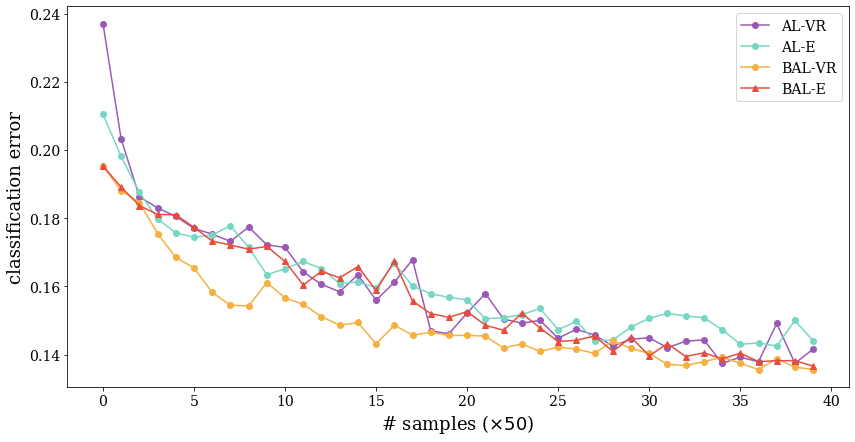

In [8]:
# 1000 initial samples
pth_1 = '../results_archive/McDropout/lenet5_fmnist_isample1000_e20_r40_ac1_b32_retrain0_variation-ratio/'
pth_2 = '../results_archive/McDropout/lenet5_fmnist_isample1000_e20_r40_ac1_b32_retrain0_entropy/'
pth_3 = '../results_archive/Lenet5Hybrid_fmnist_isample1000_e15_r41_ac1_Klreg-standard2_b100_mcmc5_netType-blundell_variation-ratio_retrain0/'
pth_4 = '../results_archive/Lenet5Hybrid_fmnist_isample1000_e15_r41_ac1_Klreg-standard2_b100_mcmc5_netType-blundell_entropy_retrain0/'
locs = [pth_1, pth_2, pth_3, pth_4]
labels = ['AL-VR','AL-E','BAL-VR','BAL-E']
f_name = 'fig_j'
PlotGraph(f_name,locs,labels)

Fully bayesian Lenet5 on fmnist

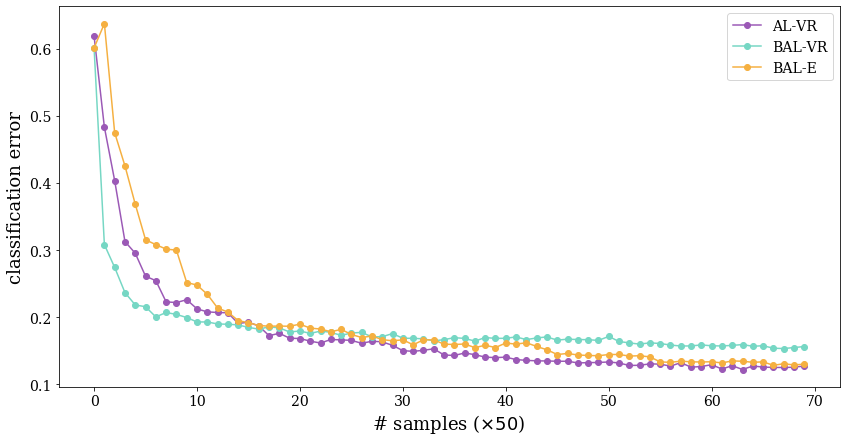

In [10]:
# 
pth_1 = '../results/McDropout/lenet5_fmnist_isample10_e50_r70_ac1_optim-Adam_top-k100_b32_rtAfter70_variation-ratio/'
pth_2 = '../results/Lenet5_fmnist_isample10_e40_r70_ac1_Klreg-standard2_b100_mcmc1_netType-jeffreyoptim-Adam_variation-ratio_rtAfter70/'
pth_3 = '../results/Lenet5_fmnist_isample10_e40_r70_ac1_Klreg-standard2_b100_mcmc1_netType-jeffreyoptim-Adam_entropy_rtAfter70/'

locs = [pth_1, pth_2, pth_3]
labels = ['AL-VR','BAL-VR','BAL-E']
f_name = 'fig_crap'
PlotGraph(f_name,locs,labels, truncate_end=70)

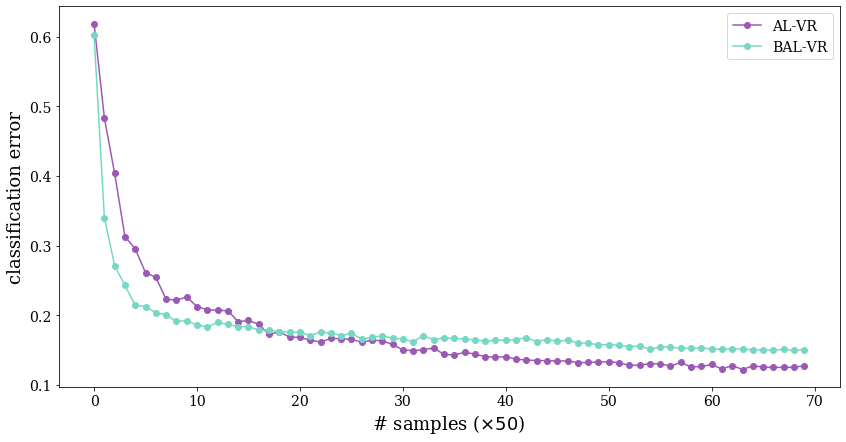

In [3]:
pth_1 = '../results/McDropout/lenet5_fmnist_isample10_e50_r70_ac1_optim-Adam_top-k100_b32_rtAfter70_variation-ratio/'
pth_2 = '../results/AlexnetLight_fmnist_isample10_e40_r70_ac1_Klreg-standard2_b100_topK-100_mcmc1_netType-jeffreyoptim-Adam_variation-ratio_rtAfter70/'

locs = [pth_1, pth_2]
labels = ['AL-VR','BAL-VR']
f_name = 'fig_crap'
PlotGraph(f_name,locs,labels, truncate_end=70)

In [ ]:
# 50 sampes
pth_1 = '../results/McDropout/lenet5_fmnist_isample10_e50_r70_ac1_optim-Adam_top-k100_b32_rtAfter70_variation-ratio/'
pth_3 = '../results/Lenet5_fmnist_isample10_e40_r70_ac1_Klreg-standard2_b100_mcmc1_netType-jeffreyoptim-Adam_entropy_rtAfter70/'
pth_4 = '../results/Lenet5_fmnist_isample10_e40_r70_ac1_Klreg-standard2_b100_mcmc1_netType-jeffreyoptim-Adam_entropy_rtAfter70/'

locs = [pth_1, pth_2, pth_3]
labels = ['AL-VR','BAL-VR','BAL-E']
f_name = 'fig_crap'
PlotGraph(f_name,locs,labels, truncate_end=70)

<h2 align="center"> Alexnet Using Fully Bayesian NN </h2>
<p>
<font size="3">Model Type:<b>Alexnet</b> program file name <b>TrainSimpleDropout_v2_beta.py</b></font> The best accuracy for a full Alexnet architecture is ~ 78.5%. Using a fully-bayesian NN and active learning we are able to achieve <b> ~ 77.5%, with < 40% of the data </b>.

The architecture is as follows (for bayesian NN simply double the number of parameters):
<img src="architectures/Alexnet_architecture.png" width=600 height=600 />


<font size="3"><b> Exprimental Setting for Bayesian NN</b></font>
    <li> Fully Bayesian NN: We found that as we increase the number of convolution layers, the mixture between a frequentist NN and a bayesian NN does not play well. We start to see severe performance losses, especially in the active learning setting, where we keep appending data samples in each round. Therefore, we used an end-to-end bayesian NN. <b>Note: Unlike the MCMC version of BNN used in other experiments, here I used a closed form version </b></li>
    <li><b>KL scaling factor: </b>$\frac{1}{\# Number of data samples in a round}$. This is <font color="red"> extremely important</font> since changing this will result in wide performance changes. In most cases, I found other Kl scaling factor to be detrimental to MNIST data. In the implementation this is indicated by the variable <i><font color="blue">standard2</font></i>.</li>
    <li><b>Training batch size</b>: 100</li>
    <li><b>Training/Testing Method:</b> Unlike the CVPR paper, <b>we do not retrain from scratch</b>. We found that this method is mostly <b>detrimental to the performance </b> of all models (Both Bayesian and Non-bayesian). At each round, we simply re-use the previous weights, and train the model for a significantly less number of epoch. More precisely, We allot 5% of the training data as validation set and use an early stopping technique, to get the best parameters based on this validation set.</li>
    <li><b>Number of MCMC samples</b>: 1 (due to closed form KL, we just need 1 sample)</li>
    <li><b>Number of NN instantiations</b>: 15. That is, when performing active learning, we create 15 instantiations of NN with dropout and estimate variation-ratio and entropy.</li>
    <li><b>Optimization Algorithm</b>: SGD. lr= 0.001, momentum=0.9<b> Note: I found that using Adam optimization leads to sub-optimal results. Specifically, I found that after adding new data samples in each round, the model gets trapped in some local optimum and struggles to move forward. This however does not seem to be a problem when using the entire dataset.</b></li>

<font size="3"><b> Exprimental Setting for Dropout neural network (NN)</b></font>
<li>Batch Size: 32</li>
<li> <b>Dropout Rate</b>: 0.5 for the last 3 dense layers and 0.25 for the convolution layers</li>
<li> <b># Batchs Per-Round</b>:In each round, we add 500 samples (when compared to just 100 in MNIST and FMNIST)</li>
<li><b>Training Methodology</b>:We retrain the model from scratch after <b> each round </b></li>
<li><b>Optimization Algorithm</b>: SGD. lr= 0.001, momentum=0.9<b> Note: I found that using Adam optimization leads to sub-optimal results. Specifically, I found that after adding new data samples in each round, the model gets trapped in some local optimum and struggles to move forward. This however does not seem to be a problem when using the entire dataset.</b></li>
<li><b>Number of NN instantiations</b>: 15. That is, when performing active learning, we create 15 instantiations of NN with dropout and estimate variation-ratio and entropy.</li>
<li>At each round we randomly allocate 10% of the training data as validation. We adopt an early stopping criteria, where we choose the parameters that result in the best accuracy for this validation set.</li>
The legend used in the graph are as follows:
AL stands for <u>a</u>ctive <u>l</u>earning with dropout-based neural network, <font color="blue">AL-VR</font> stands for <b><u>a</u>ctive <u>l</u>earning using <u>v</u>ariation-<u>r</u>atio</b>, <font color="blue">AL-E</font> stands for <u>a</u>ctive <u>l</u>earning using <u>E</u>ntropy, RS stands for <u>r</u>andom <u>s</u>ampling, legends with the character <font color="blue">B</font> in front of them are the Bayesian couter parts of the variational-ratio and entropy active-learning algorithms respectively. <font color="blue">F</font> in front of them stands for Fully Bayesian (i.e., end-to-end) architectures.

All the results were obtained with an ensemble 15 instantiations of NN. The graphs here are the average prediction accuracies. 
</p>

<h4 align="center"> Fmnist Dataset </h4>

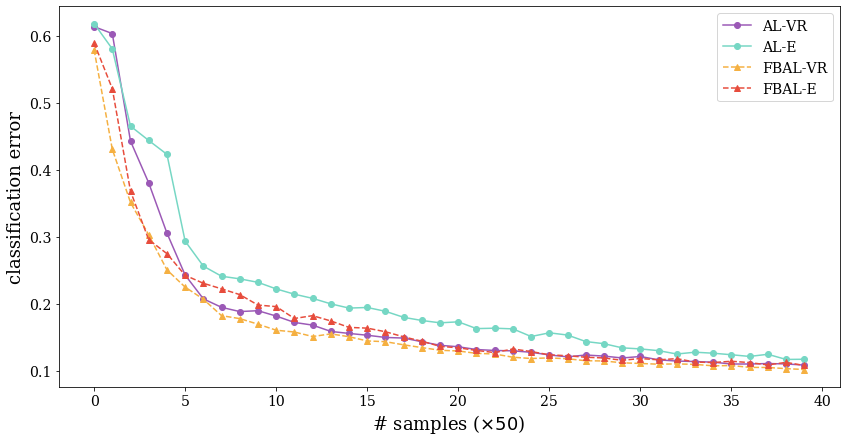

In [8]:
# 50 initial samples 2020-05-03 10:16:35 
pth_1 = '../results_archive/McDropout/alexnet_fmnist_isample50_e50_r70_ac1_optim-SGD_top-k100_b32_rtAfter70_variation-ratio/'
pth_2 = '../results_archive/McDropout/alexnet_fmnist_isample50_e50_r70_ac1_optim-SGD_top-k100_b32_rtAfter70_entropy/'
pth_3 = '../results_archive/Alexnet_fmnist_isample50_e40_r70_ac1_Klreg-standard2_b32_mcmc1_netType-jeffreyoptim-SGD_variation-ratio_rtAfter70/'
pth_4 = '../results_archive/Alexnet_fmnist_isample50_e40_r70_ac1_Klreg-standard2_b32_mcmc1_netType-jeffreyoptim-SGD_entropy_rtAfter70/'
locs = [pth_1, pth_2, pth_3, pth_4]
labels = ['AL-VR','AL-E','FBAL-VR','FBAL-E']
f_name = 'fig_k'
PlotGraph(f_name,locs,labels, truncate_end=40)

2020-05-17 15:27:59 
Update the plots with Adam optimizer with AmsGrad. The results are not significantly different.

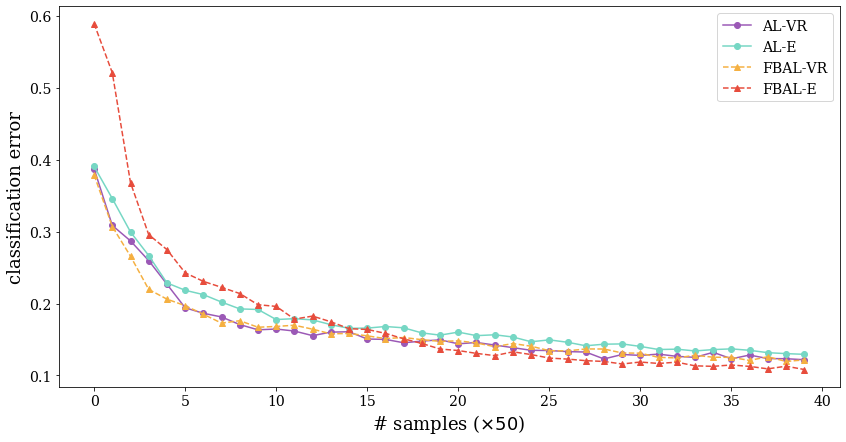

In [9]:
# 50 initial samples 2020-05-17 15:21:34 
pth_1 = '../results_archive/McDropout/alexnet_fmnist_isample50_e50_r41_ac1_optim-Adam_top-k100_b32_rtAfter100_variation-ratio/'
pth_2 = '../results_archive/McDropout/alexnet_fmnist_isample50_e50_r41_ac1_optim-Adam_top-k100_b32_rtAfter100_entropy/'
pth_3 = '../results/Alexnet_fmnist_isample50_e40_r41_ac1_Klreg-standard2_b100_topK-100_mcmc1_netType-jeffreyoptim-Adam_variation-ratio_rtAfter100/'
pth_4 = '../results_archive/Alexnet_fmnist_isample50_e40_r70_ac1_Klreg-standard2_b32_mcmc1_netType-jeffreyoptim-SGD_entropy_rtAfter70/'
locs = [pth_1, pth_2, pth_3, pth_4]
labels = ['AL-VR','AL-E','FBAL-VR','FBAL-E']
f_name = 'fig_k'
PlotGraph(f_name,locs,labels, truncate_end=40)

<h4 align="center"> Cifar10 Dataset </h4>

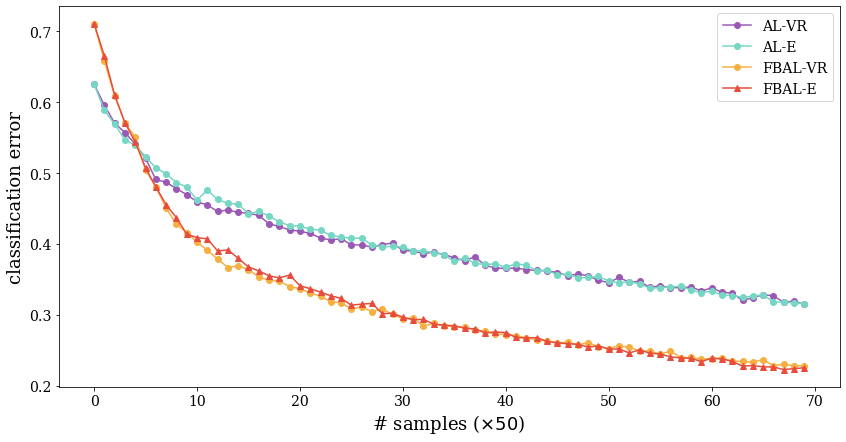

In [4]:
# 1000 initial samples
pth_1 = '../results_archive/McDropout/alexnet_cifar10_isample1000_e50_r70_ac1_optim-SGD_top-k250_b32_rtAfter70_variation-ratio/'
pth_2 = '../results_archive/McDropout/alexnet_cifar10_isample1000_e50_r70_ac1_optim-SGD_top-k250_b32_rtAfter70_entropy/'
pth_3 = '../results_archive/Alexnet_cifar10_isample1000_e40_r70_ac1_Klreg-standard2_b100_mcmc1_netType-jeffreyoptim-SGD_variation-ratio_rtAfter70/'
pth_4 = '../results_archive/Alexnet_cifar10_isample1000_e40_r70_ac1_Klreg-standard2_b100_mcmc1_netType-jeffreyoptim-SGD_entropy_rtAfter70/'
locs = [pth_1, pth_2, pth_3, pth_4]
labels = ['AL-VR','AL-E','FBAL-VR','FBAL-E']
f_name = 'fig_k'
PlotGraph(f_name,locs,labels,truncate=70)

2020-05-16 23:27:17 
Updated the results for AL-VR and AL-E. The following changes were made:
1. For dropout to work we need to perform a difference transform of Cifar10, or else, it simply gets stuck at 70% accuracy.
2. During ensemble, we remove the dropout and do just 1 or 2 ensemble. Having the old technique here resulted in a test accuracy that was widely different from the accuracy reported during training, which is incorrect.

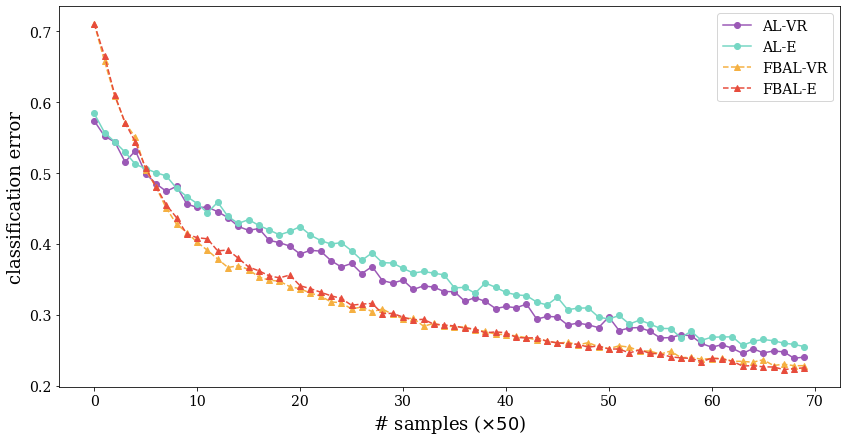

In [16]:
# 1000 initial samples
pth_1 = '../results/McDropout/alexnet_cifar10_isample1000_e50_r71_ac1_optim-Adam_top-k250_b32_rtAfter100_variation-ratio/'
pth_2 = '../results/McDropout/alexnet_cifar10_isample1000_e50_r71_ac1_optim-Adam_top-k250_b32_rtAfter100_entropy/'
pth_3 = '../results_archive/Alexnet_cifar10_isample1000_e40_r70_ac1_Klreg-standard2_b100_mcmc1_netType-jeffreyoptim-SGD_variation-ratio_rtAfter70/'
pth_4 = '../results_archive/Alexnet_cifar10_isample1000_e40_r70_ac1_Klreg-standard2_b100_mcmc1_netType-jeffreyoptim-SGD_entropy_rtAfter70/'
locs = [pth_1, pth_2, pth_3, pth_4]
labels = ['AL-VR','AL-E','FBAL-VR','FBAL-E']
f_name = 'fig_k'
PlotGraph(f_name,locs,labels,truncate_end=70)

2020-05-05 21:07:20 
<h2 align="center"> VGG16 Using Fully Bayesian NN </h2>

Using SGD optimizer.

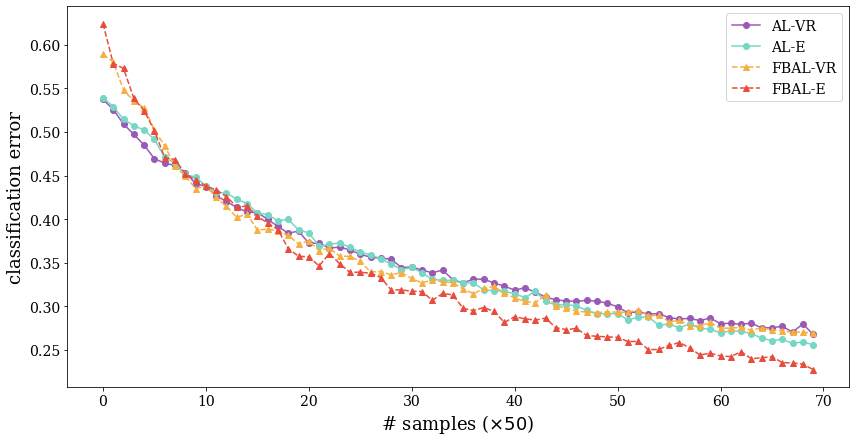

In [5]:
# 1000 initial samples this is with lr= 0.001
pth_1 = '../results_archive/McDropout/VGG16_cifar10_isample1000_e50_r70_ac1_optim-SGD_top-k250_b32_rtAfter70_variation-ratio/'
pth_2 = '../results_archive/McDropout/VGG16_cifar10_isample1000_e50_r70_ac1_optim-SGD_top-k250_b32_rtAfter70_entropy/'
pth_3 = '../results_archive/VGG_cifar10_isample1000_e40_r70_ac1_Klreg-standard2_b32_topK-250_mcmc1_netType-jeffreyoptim-SGD_variation-ratio_rtAfter70/'
pth_4 = '../results_archive/VGG_cifar10_isample1000_e40_r70_ac1_Klreg-standard2_b32_topK-250_mcmc1_netType-jeffreyoptim-SGD_entropy_rtAfter70/'
locs = [pth_1, pth_2, pth_3, pth_4]
labels = ['AL-VR','AL-E','FBAL-VR','FBAL-E']
f_name = 'fig_k'
PlotGraph(f_name,locs,labels,truncate_end=70)

2020-05-17 10:16:57 - Using Adam for both bayesian and McDropout, this seems to be the best optimizer

Note: for bayesian, do not use Ams grad since this reduces the performance of the model. One problem with this approach is that after some K rounds (in cifar10 VGG case it is around round 60) the optimizer suddenly jumps to some ill-defined region. In such case, you can retrain the model resuming from a round that was stable and decrease the Learning rate.

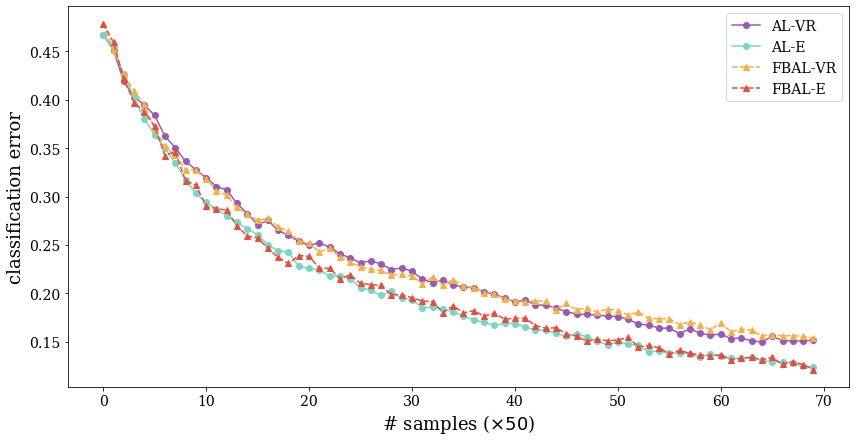

In [22]:
# 2020-05-14 11:02:59  1000 initial samples this is with lr= 0.001 - with Aam
pth_1 = '../results/McDropout/VGG_cifar10_isample1000_e50_r71_ac1_optim-Adam_top-k250_b100_rtAfter100_variation-ratio/'
pth_2 = '../results/McDropout/VGG_cifar10_isample1000_e50_r71_ac1_optim-Adam_top-k250_b100_rtAfter100_entropy/'
pth_3 = '../results/VGG_cifar10_isample1000_e50_r71_ac1_Klreg-standard2_b100_topK-250_mcmc1_netType-jeffreyoptim-Adam_variation-ratio_rtAfter100/'
pth_4 = '../results/VGG_cifar10_isample1000_e50_r71_ac1_Klreg-standard2_b100_topK-250_mcmc1_netType-jeffreyoptim-Adam_entropy_rtAfter100/'
locs = [pth_1, pth_2, pth_3, pth_4]
labels = ['AL-VR','AL-E','FBAL-VR','FBAL-E']
f_name = 'fig_k'
PlotGraph(f_name,locs,labels,truncate_end=70)